In [104]:
import numpy as np
import pandas as pd

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [138]:
data=pd.read_csv('car_age_price.csv') #loading the datasets

In [139]:
data.head(10)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
9,2017,575000


In [140]:
data.isna().sum() #finding the null values

Year     0
Price    0
dtype: int64

In [141]:
data.describe()  #five number analysis

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


# Data Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

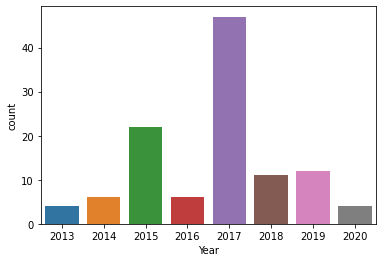

In [142]:
sns.countplot(data['Year'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


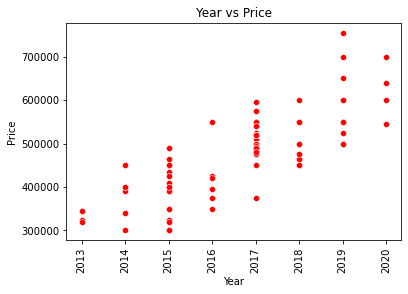

In [143]:

sns.scatterplot(data['Year'],data['Price'],color='red')
plt.title('Year vs Price')
plt.xticks(rotation=90)
plt.show()

Since only two colums no need to plot a heatmap ,just for visualization we are plotting the heatmap  

<AxesSubplot:>

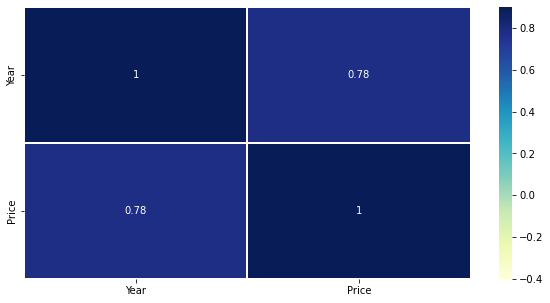

In [144]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,vmin=-0.4,vmax=0.9,linewidth=0.2,annot=True,cmap='YlGnBu')

In [145]:
X=data[['Year']]

In [146]:
X

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [147]:
y=data[['Price']]

In [148]:
y

,Price
0,465000
1,755000
2,700000
3,465000
4,465000
...,...
107,375000
108,300000
109,425000
110,420000


# Model Building

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Linear Regression Model

In [151]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)
predict=model.predict(X_test)

In [152]:
X_train.shape

(89, 1)

In [153]:
X_test.shape

(23, 1)

In [154]:
y_train.shape


(89, 1)

In [155]:
y_test.shape

(23, 1)

In [156]:
predict

array([[321055.3150062],
       [501918.7395618],
       [547134.5957007],
       [501918.7395618],
       [501918.7395618],
       [501918.7395618],
       [501918.7395618],
       [501918.7395618],
       [456702.8834229],
       [547134.5957007],
       [366271.1711451],
       [592350.4518396],
       [501918.7395618],
       [592350.4518396],
       [637566.3079785],
       [411487.027284 ],
       [501918.7395618],
       [366271.1711451],
       [411487.027284 ],
       [637566.3079785],
       [501918.7395618],
       [501918.7395618],
       [592350.4518396]])

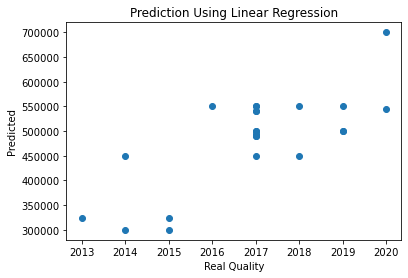

In [165]:
plt.scatter(X_test, y_test)
plt.title("Prediction Using Linear Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

In [135]:
from sklearn.metrics import r2_score
print('The r2_score value is',r2_score(y_test,predict))

The r2_score value is 0.5463606002780608


Also we can use the error value to find out the accuracy of the model

In [ ]:

#from sklearn.metrics import mean_squared_error
#print('The mean squared error value is:',mean_squared_error(y_test,predict))

# Lasso Regression

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

Lasso Regression uses L1 regularization technique (will be discussed later in this article). It is used when we have more features because it automatically performs feature selection.

In [95]:
X=data[['Year']]

In [96]:
y=data[['Price']]

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [99]:
X_train.shape

(89, 1)

In [100]:
y_train.shape

(89, 1)

In [172]:
from sklearn.linear_model import Lasso

In [173]:
# Create an instance of Lasso Regression implementation
lasso = Lasso(alpha=1.0)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(0.5463628173873827, 0.6155528127130483)